<a href="https://colab.research.google.com/github/Fatimakhanim/Machine-learning-Projects/blob/main/training_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame = True)
X_iris = iris.data[["petal length (cm)","petal width (cm)"]].values
y_iris = iris.target
tree_clf = DecisionTreeClassifier(max_depth = 2,random_state = 42)
tree_clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:

X_iris[0]


array([1.4, 0.2])

In [ ]:
from pathlib import Path

IMAGES_PATH = Path()/"images"/"decision_tress"
IMAGES_PATH.mkdir(parents = True,exist_ok=True)

In [ ]:
test_path = Path()/"test"/"decision_trees"
test_path.mkdir(parents=True,exist_ok = True)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
     tree_clf,
     out_file=str(IMAGES_PATH/"iris_tree.dot"),
     feature_names=["petal length (cm)","petal width (cm)"],
     class_names=iris.target_names,
     rounded = True,
     filled=True
  )


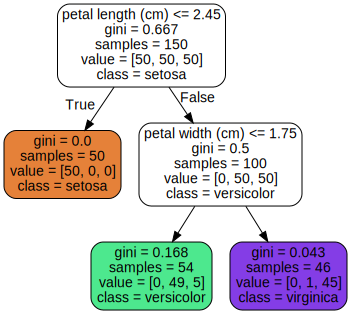

In [ ]:
from graphviz import Source

Source.from_file(IMAGES_PATH/"iris_tree.dot")

In [ ]:
from sklearn.datasets import make_moons

X_moons,y_moons = make_moons(n_samples = 150,noise = 0.2,random_state = 42)

tree_clf1=DecisionTreeClassifier(random_state = 42)
tree_clf2=DecisionTreeClassifier(min_samples_leaf=5,random_state = 42)
tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)


DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

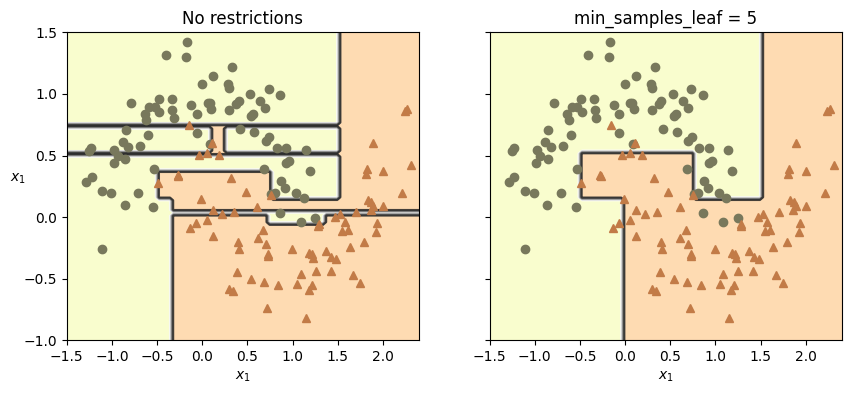

In [ ]:
def plot_decision_boundary(clf,X,y,axes,cmap):
  x1,x2 = np.meshgrid(np.linspace(axes[0],axes[1],100),
                      np.linspace(axes[2],axes[3],100))
  X_new = np.c_[x1.ravel(),x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
  plt.contour(x1,x2,y_pred,cmap = "Greys",alpha = 0.8)
  colors = {"Wistia":["#78785c","#c27b47"],"Pastel1":["red","blue"]}
  markers = ("o","^")
  for idx in(0,1):
    plt.plot(X[:,0][y==idx],X[:,1][y==idx],
      color=colors[cmap][idx],marker = markers[idx],linestyle="none")
  plt.axis(axes)
  plt.xlabel(r"$x_1$")
  plt.ylabel(r"$x_1$",rotation = 0)

fig,axes = plt.subplots(ncols=2,figsize = (10,4),sharey = True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1,X_moons,y_moons,
                       axes = [-1.5,2.4,-1,1.5],cmap ="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()



In [ ]:
X_moons_test,y_moons_test = make_moons(n_samples=1000,noise=0.2,
                                       random_state = 43)

In [ ]:
tree_clf1.score(X_moons_test,y_moons_test)

0.898

In [ ]:
tree_clf2.score(X_moons_test,y_moons_test)

0.92

In [ ]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X_quad = np.random.rand(200,1)-0.5
y_quad = X_quad **2 +0.025 * np.random.randn(200,1)

tree_reg = DecisionTreeRegressor(max_depth = 2,random_state = 42)
tree_reg.fit(X_quad , y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

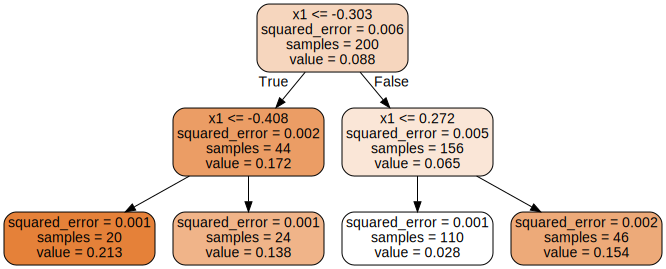

In [ ]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH/"regression_tree.dot"),
    feature_names = ["x1"],
    rounded = True,
    filled = True
)
Source.from_file(IMAGES_PATH/"regression_tree.dot")

In [ ]:
tree_reg2 = DecisionTreeRegressor(max_depth = 3,random_state = 42)
tree_reg2.fit(X_quad,y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

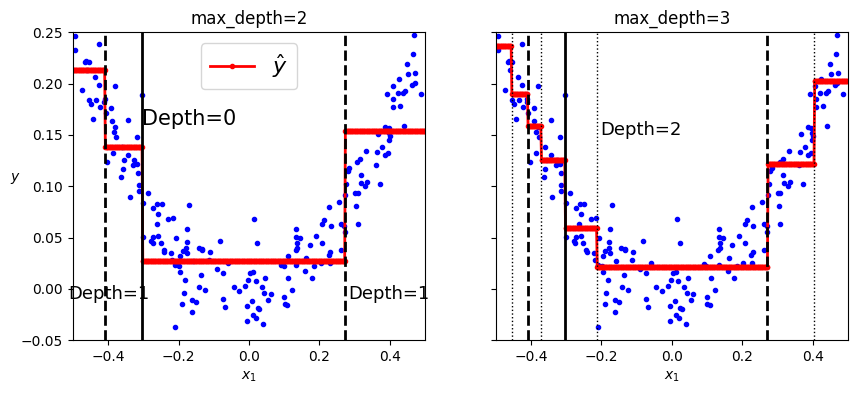

In [ ]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

plt.show()

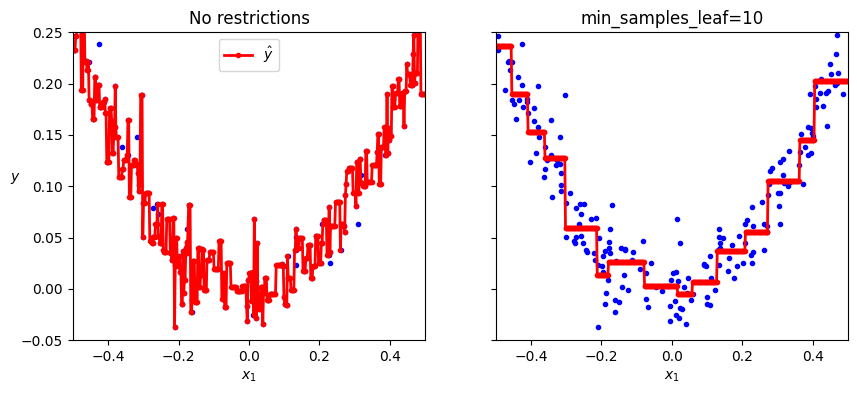

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")
plt.show()

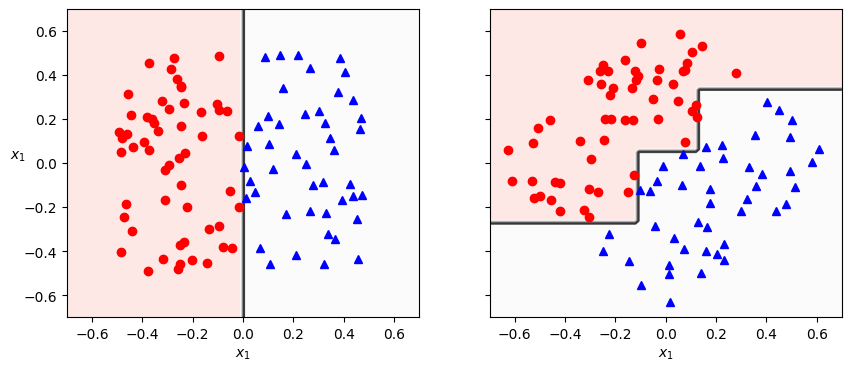

In [ ]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")


plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pca_pipeline = make_pipeline(StandardScaler(),PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth = 2,random_state=42)
tree_clf_pca.fit(X_iris_rotated,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)